In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np

/tmp/ipykernel_541492/2065064994.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Historical Stock Data

In [312]:
# create ticker for GameStop
ticker = yf.Ticker('GME')

# get data of the most recent year
df = ticker.history(start = '2021-01-04', end = '2021-12-31')

# set Date as one column instead of index
df = df.reset_index()
df.head()

/home/idoit/anaconda3/envs/fanjiang/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04 00:00:00-05:00,4.7500,4.7750,4.2875,4.3125,40090000,0.0,0.0
1,2021-01-05 00:00:00-05:00,4.3375,4.5200,4.3075,4.3425,19846000,0.0,0.0
2,2021-01-06 00:00:00-05:00,4.3350,4.7450,4.3325,4.5900,24224800,0.0,0.0
3,2021-01-07 00:00:00-05:00,4.6175,4.8625,4.5050,4.5200,24517200,0.0,0.0
4,2021-01-08 00:00:00-05:00,4.5450,4.5750,4.2700,4.4225,25928000,0.0,0.0


In [313]:
# general description on data
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.0,251.0
mean,42.778446,45.486554,40.095538,42.447918,5.753446e+07,0.0,0.0
std,14.904619,16.225853,13.678212,14.416562,1.140554e+08,0.0,0.0
min,4.335000,4.520000,4.270000,4.312500,3.272800e+06,0.0,0.0
25%,39.092501,40.142500,36.857500,38.871250,8.645400e+06,0.0,0.0
50%,44.372501,46.250000,42.990002,44.525002,1.717400e+07,0.0,0.0
75%,50.982500,53.132502,48.968750,50.697500,4.891520e+07,0.0,0.0
max,94.927498,120.750000,72.877502,86.877502,7.886316e+08,0.0,0.0


it seems that all the values of Dividends and StockSplits are 0.0, not offering any info, so drop these columns

In [314]:
col = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[col]
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-01-04 00:00:00-05:00,4.7500,4.7750,4.2875,4.3125,40090000
1,2021-01-05 00:00:00-05:00,4.3375,4.5200,4.3075,4.3425,19846000
2,2021-01-06 00:00:00-05:00,4.3350,4.7450,4.3325,4.5900,24224800
3,2021-01-07 00:00:00-05:00,4.6175,4.8625,4.5050,4.5200,24517200
4,2021-01-08 00:00:00-05:00,4.5450,4.5750,4.2700,4.4225,25928000


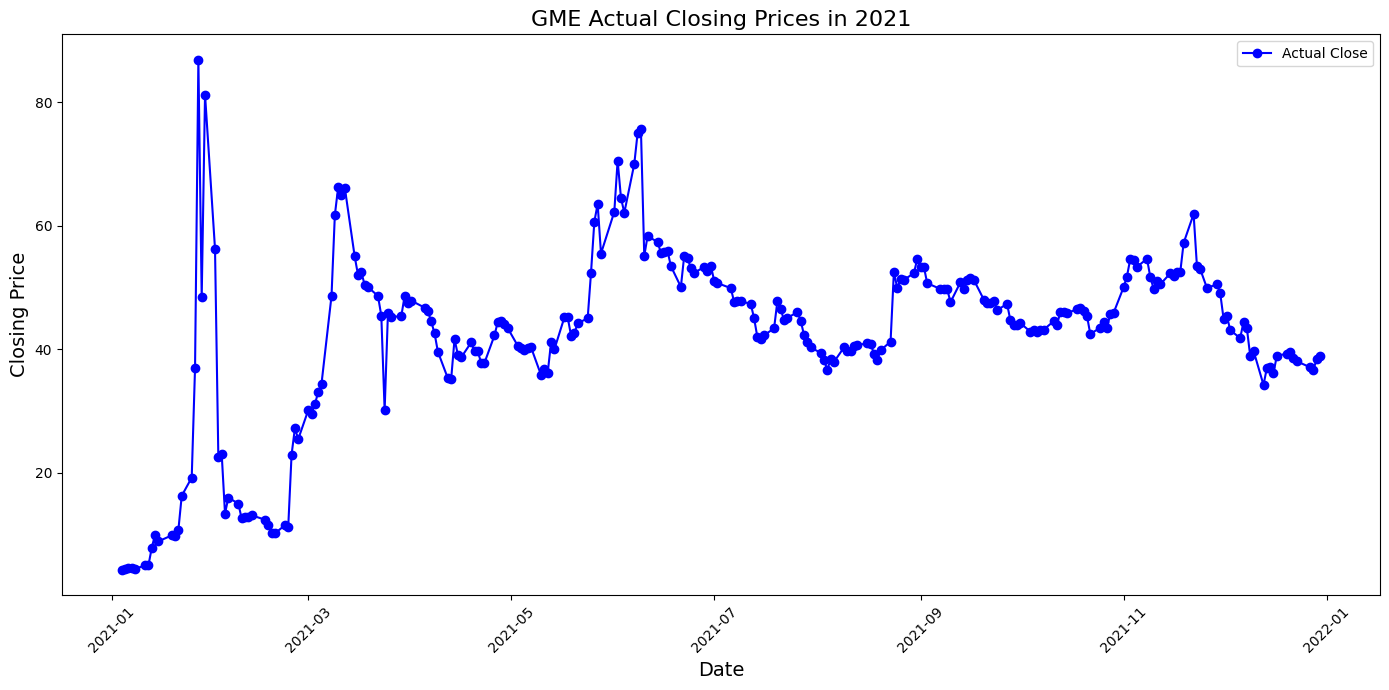

In [315]:
import matplotlib.pyplot as plt


# Ensure the 'Date' column is in datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Setting the plot size for better readability
plt.figure(figsize=(14, 7))

# Plotting the actual closing prices in the training period
plt.plot(df['Date'], df['Close'], label='Actual Close', color='blue', marker='o')

# Adding title and labels with font size adjustments
plt.title('GME Actual Closing Prices in 2021', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Rotating date labels for better visibility
plt.xticks(rotation=45)

# Adding a legend to distinguish the actual values
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

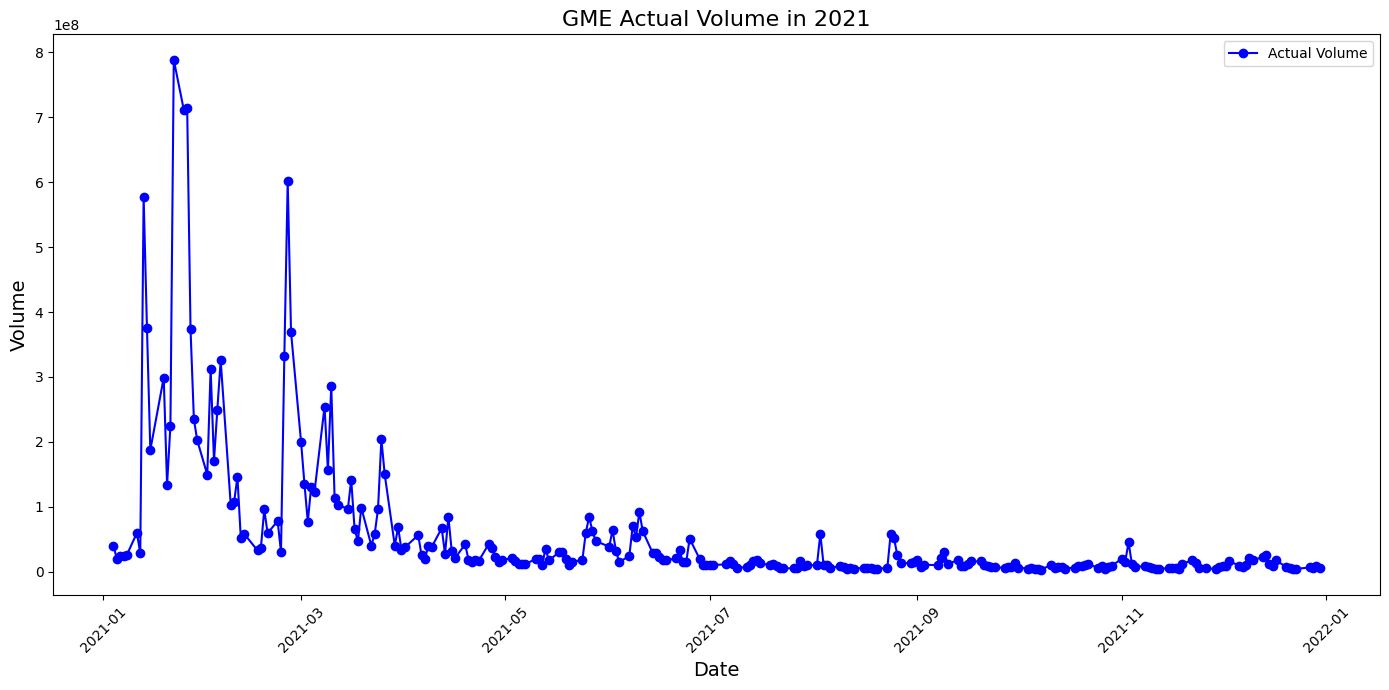

In [317]:
# Ensure the 'Date' column is in datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Setting the plot size for better readability
plt.figure(figsize=(14, 7))

# Plotting the actual closing prices in the training period
# df['Volume'] = np.log(df['Volume']  + 1e-6)
plt.plot(df['Date'], df['Volume'], label='Actual Volume', color='blue', marker='o')

# Adding title and labels with font size adjustments
plt.title('GME Actual Volume in 2021', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)

# Rotating date labels for better visibility
plt.xticks(rotation=45)

# Adding a legend to distinguish the actual values
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

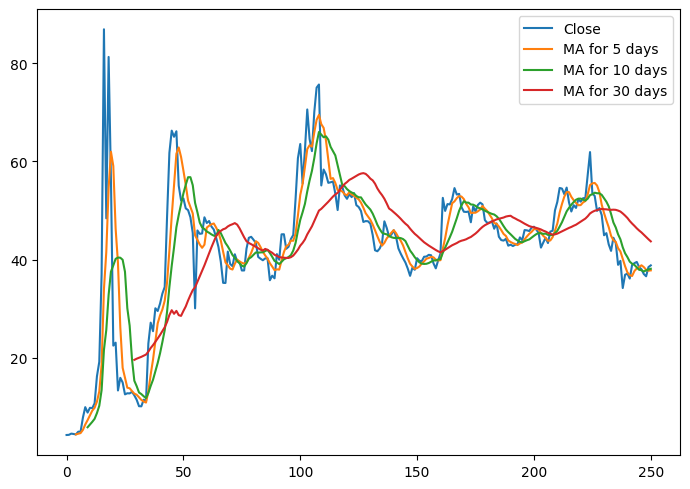

In [325]:
ma_day = [5, 10, 30]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(window=ma).mean()

fig, ax = plt.subplots()  # You only need a single axis object here
fig.set_figheight(5)
fig.set_figwidth(7)

# Specify ax=ax instead of ax=axes[0,0] since there's only one plot
df[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=ax)

plt.tight_layout()
plt.show() 


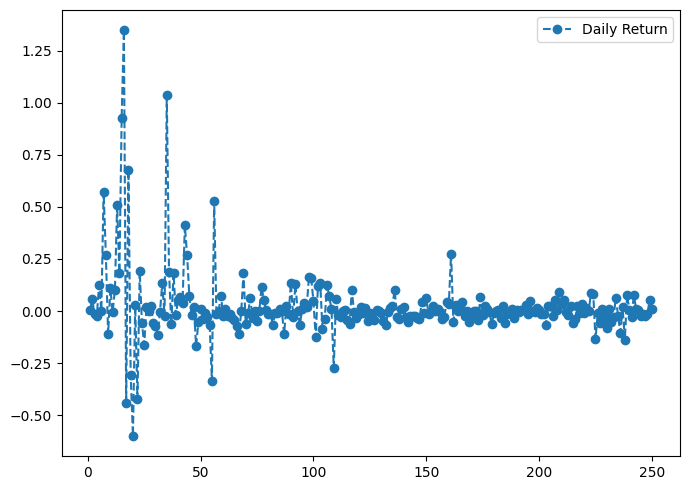

In [326]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Close'].pct_change()

fig, ax = plt.subplots()  
fig.set_figheight(5)
fig.set_figwidth(7)

# Then we'll plot the daily return percentage
df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')

plt.tight_layout()
plt.show() 



## Financial News data for sentiment

In [302]:
import os
import smtplib
import ssl
from datetime import datetime


import pandas
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth

# Reddit API URL to Call
reddit_news_url = 'https://oauth.reddit.com/r/worldnews/hot'

# Output File Name
output_file = f'data/news_{datetime.now().date()}.csv'

# Reddit API Config Details
client_id = 'vn5-OoqbqyA5f4ggehsP8g'
client_secret = 	'U_hpUM_G20IAlOUikM9x1oBVPq30sQ'
user_name = os.environ.get('USER_NAME')
password = os.environ.get('PASSWORD')




def reddit_auth() -> str:
    """
    Function to get the access token from Reddit API
    :param clientid: Client ID of the App
    :param clientsecret: Client Secret of the app
    :param username: Username of the account
    :param pwd: Password of the account
    :return: access_token if the response is OK else -1
    """
    auth = HTTPBasicAuth(client_id, client_secret)
    data = {'grant_type': 'password',
            'username': user_name,
            'password': password}
    headers = {'User-Agent': 'Github1', 'Content-Type': 'application/x-www-form-urlencoded'}

    res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, data=data, headers=headers)
    if res.status_code == 200:
        access_token = res.json()['access_token']
        return access_token
    else:
        return -1


def get_data_from_api(api_url: str, token: str) -> requests:
    """
    Function to get data from the Reddit API
    :param api_url: URL of the Reddit API
    :param token: Token received from the Auth URL
    :return: Return the request output if status is OK else -1
    """
    headers = {'User-Agent': 'Github', 'Authorization': f"bearer {token}"}
    params = {'limit': 25}
    res = requests.get(api_url, headers=headers, params=params)
    if res.status_code == 200:
        return res
    else:
        return -1


def parse_post_data(result: str) -> pandas.DataFrame:
    """
    Function to parse the Reddit API output into a pandas datafrome
    :param result: Output from the API Request
    :return: A pandas dataframe if the API output has data else -1
    """
    #webhook = DiscordWebhook(url=web_hook, content=f"News For {datetime.now().date()}")
    if len(result.json()) > 0:
        records =[]
        for post in result.json()['data']['children']:
            current_record = {
                'subreddit': post['data']['subreddit'],
                'title': post['data']['title'],
                'url': post['data']['url'],
                'upvote_ratio': post['data']['upvote_ratio'],
                'ups': post['data']['ups'],
                'downs': post['data']['downs'],
                'score': post['data']['score']
            }
            # append relevant data to dataframe
            records.append(current_record)
            #embed = DiscordEmbed(title=post['data']['title'], description=post['data']['url'], url=post['data']['url'])
            #webhook.add_embed(embed)
        df = pd.DataFrame.from_records(records)
        df = df.sort_values('score', ascending=False)
        #response = webhook.execute()
        return df.reset_index(drop=True)
    else:
        return -1






    

In [304]:
token = reddit_auth()
    # Call the API
result = get_data_from_api(reddit_news_url, token)
    # Parse the data
data = parse_post_data(result)

## Since the dataset offered already has sentiment scores, directly use them for feature engineering

In [7]:
comment = pd.read_csv("./s.csv", on_bad_lines='skip')

/tmp/ipykernel_541492/302961704.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  comment = pd.read_csv("./s.csv", on_bad_lines='skip')


In [8]:
comment = comment.drop(columns=["Unnamed: 0"])
comment.head()

,id,title,url,score,author,num_comments,date,flair,compound,neg,...,_poss,_intj,_appos,_npadvmod,_predet,_case,_expl,_oprd,_dative,_nmod
0,kqfajb,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,https://www.reddit.com/r/GME/comments/kqfajb/y...,1.0,TitsDownOnly,9.0,2021-01-04,NaN,0.9872,0.000,...,0,0,6,0,0,0,0,0,0,0
1,kqjh2t,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,/r/wallstreetbets/comments/kqcwdo/gamestops_gr...,1.0,zoomermoney,1.0,2021-01-04,NaN,0.9906,0.000,...,0,0,3,0,0,0,0,0,0,0
2,kqvp7l,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,https://www.reddit.com/r/GME/comments/kqvp7l/t...,1.0,TitsDownOnly,6.0,2021-01-05,NaN,0.5319,0.000,...,0,0,0,0,0,0,0,0,0,0
3,krcwch,You already know what we must do brothers and ...,/r/wallstreetbets/comments/kr98ym/gme_gang_we_...,1.0,dontforgettolive,4.0,2021-01-05,NaN,-0.2960,0.115,...,1,0,0,0,0,0,0,0,0,0
4,krnthg,ICR conference (11th Jan),https://www.reddit.com/r/GME/comments/krnthg/i...,1.0,nicky94,10.0,2021-01-06,NaN,0.0000,0.000,...,0,0,0,1,0,0,0,0,0,0


In [328]:
comment[['neg','neu','pos','compound']]

,neg,neu,pos,compound
0,0.000,0.189,0.811,0.9872
1,0.000,0.079,0.921,0.9906
2,0.000,0.744,0.256,0.5319
3,0.115,0.885,0.000,-0.2960
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
1033231,0.128,0.872,0.000,-0.2960
1033232,0.783,0.217,0.000,-0.7351
1033233,0.190,0.810,0.000,-0.3274
1033234,0.000,1.000,0.000,0.0000


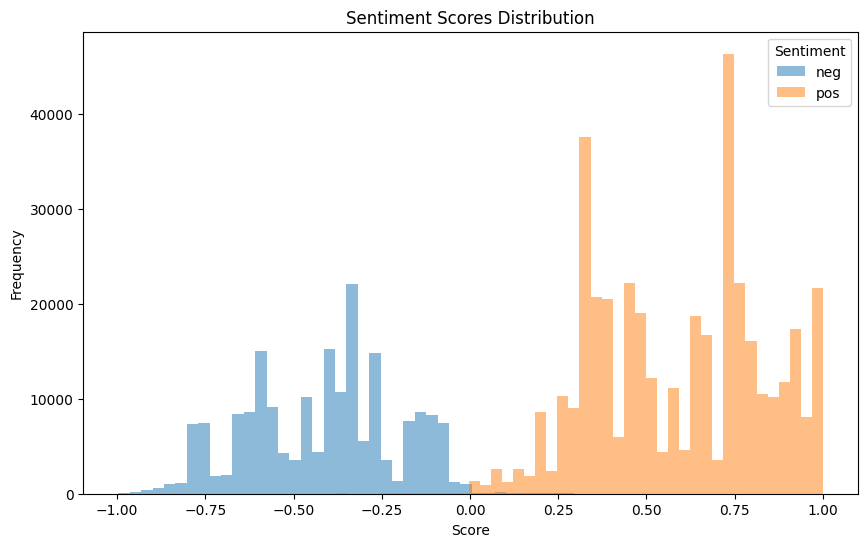

In [334]:
com = comment[comment['compound']!=0].copy()
com['label'] = com[['neg', 'pos']].idxmax(axis=1)
plt.figure(figsize=(10, 6))  # 根据需要调整大小
com.groupby("label")["compound"].plot(kind='hist', bins=50, alpha=0.5, legend=True)
plt.legend(title='Sentiment')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [106]:
comment.columns

Index(['id', 'title', 'url', 'score', 'author', 'num_comments', 'date',
       'flair', 'compound', 'neg', 'neu', 'pos', 'spacy_title', 'clean_text',
       'char_count', 'word_count', 'word_count_cln', 'stopword_count',
       'pos_tags', 'dep_tags', '_NOUN', '_VERB', '_ADP', '_ADJ', '_DET',
       '_PROPN', '_INTJ', '_PUNCT', '_NUM', '_PRON', '_ADV', '_PART', '_amod',
       '_ROOT', '_punct', '_advmod', '_auxpass', '_nsubjpass', '_ccomp',
       '_acomp', '_neg', '_nsubj', '_aux', '_agent', '_det', '_pobj', '_prep',
       '_csubj', '_nummod', '_attr', '_acl', '_relcl', '_dobj', '_pcomp',
       '_xcomp', '_cc', '_conj', '_mark', '_prt', '_compound', '_dep',
       '_advcl', '_parataxis', '_poss', '_intj', '_appos', '_npadvmod',
       '_predet', '_case', '_expl', '_oprd', '_dative', '_nmod'],
      dtype='object')

In [126]:
sentiment = comment.copy()
sentiment['sum_cpd'] = sentiment.groupby('date')['_compound'].transform('sum')
sentiment['max_cnt'] = sentiment.groupby('date')['char_count'].transform('max')
sentiment['cnt_cpd_day'] = sentiment.groupby('date')['compound'].transform('count')

In [135]:
col = ['date','sum_cpd', 'max_cnt', 'cnt_cpd_day']
sentiment = sentiment[col]

,date,sum_cpd,max_cnt,cnt_cpd_day
0,2021-01-04,0,37,2
1,2021-01-04,0,37,2
2,2021-01-05,1,95,2
3,2021-01-05,1,95,2
4,2021-01-06,2,87,2


In [137]:
sentiment.drop_duplicates(inplace = True)
sentiment.head()

,date,sum_cpd,max_cnt,cnt_cpd_day
0,2021-01-04,0,37,2
2,2021-01-05,1,95,2
4,2021-01-06,2,87,2
6,2021-01-10,0,77,1
7,2021-01-11,5,66,4


In [142]:
sentiment['sum_cpd'] =  np.log(sentiment['sum_cpd'] + 1e-3)
sentiment.head()

,date,sum_cpd,max_cnt,cnt_cpd_day
0,2021-01-04,-6.907755,37,2
2,2021-01-05,0.001000,95,2
4,2021-01-06,0.693647,87,2
6,2021-01-10,-6.907755,77,1
7,2021-01-11,1.609638,66,4


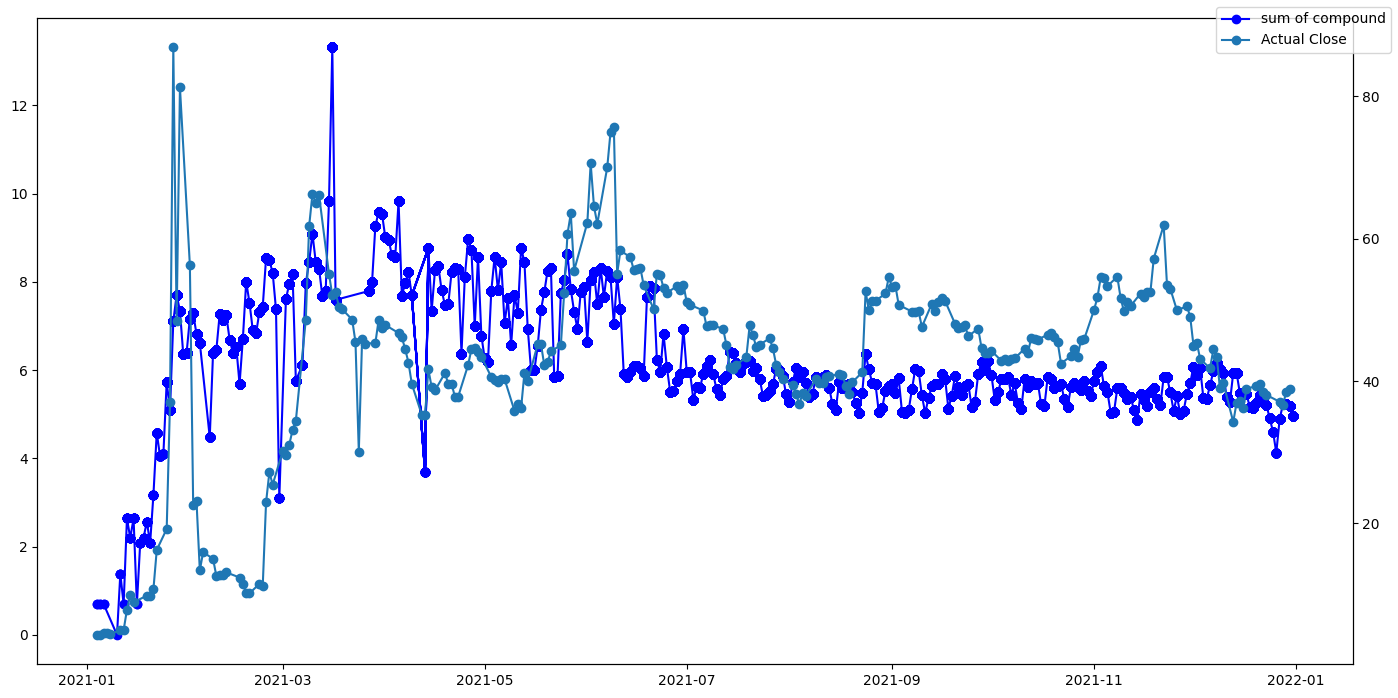

In [134]:
# Ensure the 'Date' column is in datetime format for proper plotting
# sen = sentiment.copy()
# sen['date'] = pd.to_datetime(sen['date'])


# Setting the plot size for better readability
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the actual closing prices in the training period
field = 'cnt_cpd_day'
cc = sentiment.copy()
cc['date'] = pd.to_datetime(cc['date'])
cc[field] = np.log(cc[field] + 1e-6)
ax1.plot(cc['date'], cc[field], label='sum of compound', color='blue', marker='o')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close'], label='Actual Close', marker='o')

fig.legend()
fig.tight_layout()

In [139]:
num_comment = comment.copy()
num_comment['date'] = pd.to_datetime(num_comment['date'])
num_comment = num_comment.select_dtypes(include=['number', 'datetime64[ns]'])
num_comment = num_comment.groupby('date').max()
num_comment = num_comment.reset_index()
# num_comment = num_comment.map(lambda x: np.log(x + 1e-6) if np.issubdtype(type(x), np.number) and x > 0 else x)

num_df = df.copy()
num_df['Date'] = pd.to_datetime(num_df['Date']).dt.tz_localize(None).dt.date
num_df['Date'] = pd.to_datetime(num_df['Date'])
num_df = num_df[['Date', 'Close']]

# Now both columns are just dates without times, you can merge
merged_num_df = pd.merge(num_comment, num_df, left_on='date', right_on='Date')

correlation_matrix = merged_num_df.corr()
correlation_matrix['Close'].sort_values(ascending=False).head(5)

Close             1.000000
char_count        0.543642
stopword_count    0.436344
_advmod           0.417992
Date              0.395898
Name: Close, dtype: float64

In [141]:
num_comment = comment.copy()
num_comment['date'] = pd.to_datetime(num_comment['date'])
num_comment = num_comment.select_dtypes(include=['number', 'datetime64[ns]'])
num_comment = num_comment.groupby('date').sum()
num_comment = num_comment.reset_index()
num_comment = num_comment.map(lambda x: np.log(x + 1e-6) if np.issubdtype(type(x), np.number) and x > 0 else x)

num_df = df.copy()
num_df['Date'] = pd.to_datetime(num_df['Date']).dt.tz_localize(None).dt.date
num_df['Date'] = pd.to_datetime(num_df['Date'])
num_df = num_df[['Date', 'Close']]

# Now both columns are just dates without times, you can merge
merged_num_df = pd.merge(num_comment, num_df, left_on='date', right_on='Date')

correlation_matrix = merged_num_df.corr()
correlation_matrix['Close'].sort_values(ascending=False).head(5)

Close    1.000000
Date     0.395898
date     0.395898
_DET     0.112205
_oprd    0.110930
Name: Close, dtype: float64

In [143]:
# First, ensure both date columns are in datetime format without timezones
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None).dt.date

# Now both columns are just dates without times, you can merge
merged_df = pd.merge(sentiment, df, left_on='date', right_on='Date')

In [144]:
merged_df.drop(columns = ['date'], inplace = True)

In [16]:
# merged_df['cnt_cpd_day'].fillna(0, inplace=True)

# forward_filled = merged_df['avg_cpd_day'].fillna(method='ffill')
# backward_filled = merged_df['avg_cpd_day'].fillna(method='bfill')

# merged_df['avg_cpd_day'] = (forward_filled + backward_filled) / 2

In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.autograd import Variable
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime, timedelta

In [146]:
# df[df['Date']<"2021-09-01"]['Close']
comparison_date = pd.to_datetime("2021-09-01")
shape = df[pd.to_datetime(df['Date'])<comparison_date].shape[0]
shape

167

In [271]:
merged_df['Date']

0      2021-01-04
1      2021-01-05
2      2021-01-06
3      2021-01-11
4      2021-01-12
          ...    
234    2021-12-23
235    2021-12-27
236    2021-12-28
237    2021-12-29
238    2021-12-30
Name: Date, Length: 239, dtype: object

In [272]:
merged_df[merged_df['Date']== "2021-06-04"]

,sum_cpd,max_cnt,cnt_cpd_day,Date,Open,High,Low,Close,Volume


In [147]:

#  The .values attribute returns the data as a NumPy array. The .reshape(-1, 1) function changes
#  the shape of this array to ensure it has two dimensions, with one column and as many rows as necessary.
close_prices = df.iloc[:shape]['Close'].values.reshape(-1, 1)
volumns = df.iloc[:shape]['Volume'].values.reshape(-1, 1)
sent_1 = merged_df.iloc[:shape]['sum_cpd'].values.reshape(-1, 1)
sent_2 = merged_df.iloc[:shape]['max_cnt'].values.reshape(-1, 1)

# # Scale the data -> you can use any appropriate scaling methodology
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_close_prices = scaler.fit_transform(close_prices)

# scaler2 = MinMaxScaler(feature_range=(0, 1))
# scaled_volume = scaler2.fit_transform(volumns)

# scaler4 = MinMaxScaler(feature_range=(0, 1))
# scaled_sent_cnt = scaler4.fit_transform(sent_cnt)

In [148]:
input = np.concatenate((close_prices, volumns, sent_1, sent_2), axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_input = scaler.fit_transform(input)


In [342]:
input_no_sent = np.concatenate((close_prices, volumns), axis=1)
scaler_no_sent = MinMaxScaler(feature_range=(0, 1))
scaled_input_no_sent = scaler_no_sent.fit_transform(input)

In [149]:
# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [150]:
SEQUENCE_LENGTH = 5  # You can adjust this value -> parameter tuning
X, y = create_sequences(scaled_input, SEQUENCE_LENGTH)
print(X[0],y[0])

[[0.00000000e+00 4.62615786e-02 0.00000000e+00 0.00000000e+00]
 [3.63352618e-04 2.04681149e-02 3.45545879e-01 2.04225352e-01]
 [3.36099006e-03 2.60472702e-02 3.80189098e-01 1.76056338e-01]
 [2.51317114e-03 2.64198254e-02 4.26002977e-01 1.02112676e-01]
 [1.33228523e-03 2.82173664e-02 3.45545879e-01 1.40845070e-01]] 0.008145099177967761


In [343]:
SEQUENCE_LENGTH = 5  # You can adjust this value -> parameter tuning
X2, y2 = create_sequences(scaled_input_no_sent, SEQUENCE_LENGTH)

X2_train, y2_train = X2[:train_indices[-1]-SEQUENCE_LENGTH], y2[:train_indices[-1]-SEQUENCE_LENGTH]
X2_test, y2_test = X2[train_indices[-1]-SEQUENCE_LENGTH+1:], y2[train_indices[-1]-SEQUENCE_LENGTH+1: ]

In [230]:
# Split the data into training and test sets (train on data until May 31st)
TRAIN_END_DATE = pd.to_datetime('2021-05-31')
train_indices = df[pd.to_datetime(df['Date']) <= TRAIN_END_DATE].index
X_train, y_train = X[:train_indices[-1]-SEQUENCE_LENGTH], y[:train_indices[-1]-SEQUENCE_LENGTH]

In [231]:
print(X_train.shape)
print(y_train.shape)

(96, 5, 4)
(96,)


In [264]:
TEST_START_DATE = pd.to_datetime('2021-06-01')
TEST_END_DATE = pd.to_datetime('2021-08-31')
test_indices = df[
    (pd.to_datetime(df['Date']) <= TEST_END_DATE) &
    (pd.to_datetime(df['Date']) >= TEST_START_DATE) ].index


In [233]:
X_test, y_test = X[train_indices[-1]-SEQUENCE_LENGTH+1:], y[train_indices[-1]-SEQUENCE_LENGTH+1: ]
print(len(y_test))

65


In [234]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 5, 4) (96,) (65, 5, 4) (65,)


In [265]:
train_indices[-1]-SEQUENCE_LENGTH+1,test_indices[0]

(97, 102)


The model described is a neural network architecture using Long Short-Term Memory (LSTM) layers, commonly employed for sequence prediction problems such as time series forecasting. Here's a breakdown of each component of the model:

1. LSTM Layer with return_sequences=True
LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)):
This is the first layer in the model and an LSTM layer with 50 units. LSTM units are a type of recurrent neural network (RNN) cell that are effective in capturing long-term dependencies in sequence data.
return_sequences=True indicates that this layer returns the full sequence of outputs for each sample. This is necessary when stacking LSTM layers so that the subsequent LSTM layer can receive sequences of data as input.
input_shape=(X_train.shape[1], 1) specifies the shape of the input data. In this context, X_train.shape[1] refers to the sequence length (number of time steps), and 1 refers to the number of features per time step. This model is configured to work with a single feature per time step, typical for univariate time series forecasting (e.g., predicting a stock price based on past values of the stock price alone).


2. LSTM Layer with return_sequences=False
LSTM(50, return_sequences=False):
This is the second LSTM layer in the model, also with 50 units.
return_sequences=False means this layer only returns the output for the last time step in the input sequence. This is used when the subsequent layer expects a single vector per sample rather than a sequence of vectors. Since the next layer is a dense layer (fully connected layer), only the final output of the LSTM is needed.
This layer serves to further process the information extracted by the first LSTM layer, focusing on extracting features that will be useful for the final prediction.


3. Dense Layer
Dense(1):
This is a fully connected layer that follows the LSTM layers. It has a single unit.
The purpose of this layer is to output a single value, which is the predicted value for the next time step in the sequence. For example, in stock price prediction, this would be the predicted stock price for the next day.
Since this model is likely intended for regression (predicting a continuous value), there's no activation function specified, implying a linear activation is used by default. This allows the model to output values in the range of the real numbers.

In [235]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()

        # self.rnn = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.rnn = nn.RNN(input_size, hidden_layer_size, batch_first=True)
        self.mlp = nn.Sequential(
          nn.ReLU(),
          nn.Linear(hidden_layer_size, output_size),
        )

    def forward(self, x):
        x, _ = self.rnn(x)
        # lstm_out, (h_n, c_n) = self.lstm2(lstm_out)
        predictions = self.mlp(x[:, -1, :])
        # return predictions
        return predictions

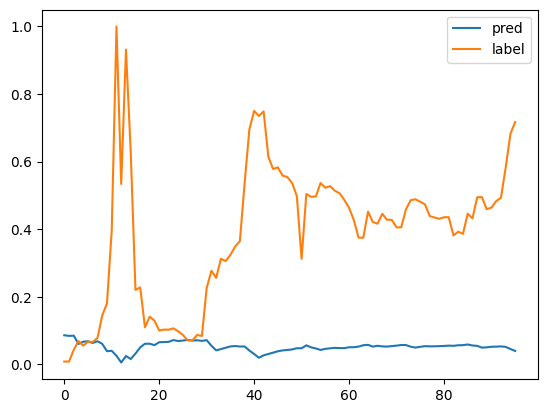

Epoch 1 Loss: 0.16076157987117767
Epoch 2 Loss: 0.1257784515619278
Epoch 3 Loss: 0.10042095184326172
Epoch 4 Loss: 0.08006830513477325
Epoch 5 Loss: 0.06317584961652756
Epoch 6 Loss: 0.049774039536714554
Epoch 7 Loss: 0.04100591316819191
Epoch 8 Loss: 0.03794221207499504
Epoch 9 Loss: 0.041592713445425034
Epoch 10 Loss: 0.04707514867186546
Epoch 11 Loss: 0.04835139214992523
Epoch 12 Loss: 0.04507844150066376
Epoch 13 Loss: 0.039877258241176605
Epoch 14 Loss: 0.035867076367139816
Epoch 15 Loss: 0.03420153632760048
Epoch 16 Loss: 0.03456554934382439
Epoch 17 Loss: 0.03574826940894127
Epoch 18 Loss: 0.03637970611453056
Epoch 19 Loss: 0.035879649221897125
Epoch 20 Loss: 0.03443143144249916
Epoch 21 Loss: 0.03260551765561104
Epoch 22 Loss: 0.031084435060620308
Epoch 23 Loss: 0.030360765755176544
Epoch 24 Loss: 0.030364638194441795
Epoch 25 Loss: 0.030590251088142395
Epoch 26 Loss: 0.030460186302661896
Epoch 27 Loss: 0.029702523723244667
Epoch 28 Loss: 0.02862749993801117
Epoch 29 Loss: 0.02

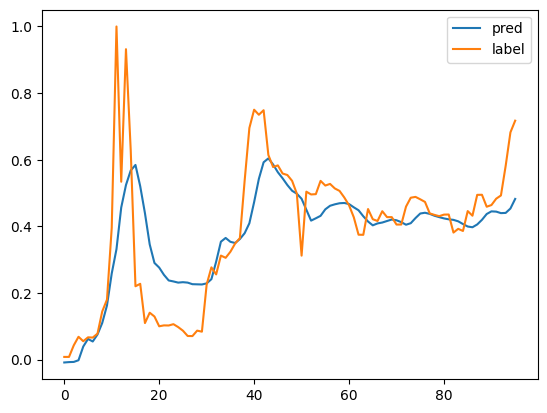

Epoch 51 Loss: 0.018418826162815094
Epoch 52 Loss: 0.018063178285956383
Epoch 53 Loss: 0.017949260771274567
Epoch 54 Loss: 0.01780315302312374
Epoch 55 Loss: 0.017449622973799706
Epoch 56 Loss: 0.01725105382502079
Epoch 57 Loss: 0.01710319332778454
Epoch 58 Loss: 0.016764141619205475
Epoch 59 Loss: 0.016528410837054253
Epoch 60 Loss: 0.016353992745280266
Epoch 61 Loss: 0.016054460778832436
Epoch 62 Loss: 0.015824973583221436
Epoch 63 Loss: 0.015668494626879692
Epoch 64 Loss: 0.01542265247553587
Epoch 65 Loss: 0.015224006026983261
Epoch 66 Loss: 0.015079115517437458
Epoch 67 Loss: 0.014870132319629192
Epoch 68 Loss: 0.014693324454128742
Epoch 69 Loss: 0.01454633753746748
Epoch 70 Loss: 0.01434189174324274
Epoch 71 Loss: 0.01416721474379301
Epoch 72 Loss: 0.014000152237713337
Epoch 73 Loss: 0.013788707554340363
Epoch 74 Loss: 0.013611801899969578
Epoch 75 Loss: 0.01342796254903078
Epoch 76 Loss: 0.013226784765720367
Epoch 77 Loss: 0.013059322722256184
Epoch 78 Loss: 0.012873582541942596


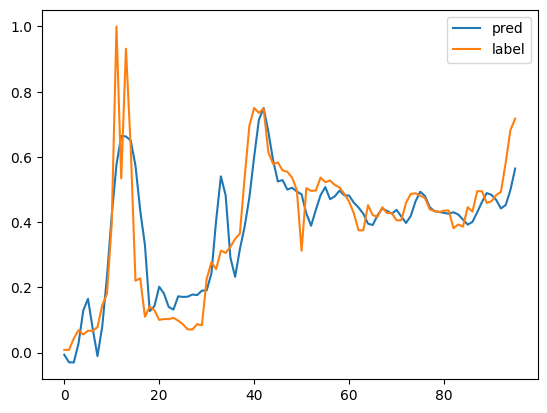

Epoch 101 Loss: 0.010436486452817917
Epoch 102 Loss: 0.010387065820395947
Epoch 103 Loss: 0.010336537845432758
Epoch 104 Loss: 0.010291841812431812
Epoch 105 Loss: 0.010245163924992085
Epoch 106 Loss: 0.010202061384916306
Epoch 107 Loss: 0.010156840085983276
Epoch 108 Loss: 0.010112342424690723
Epoch 109 Loss: 0.010072060860693455
Epoch 110 Loss: 0.010030205361545086
Epoch 111 Loss: 0.009993239305913448
Epoch 112 Loss: 0.009955356828868389
Epoch 113 Loss: 0.009915589354932308
Epoch 114 Loss: 0.00987600814551115
Epoch 115 Loss: 0.009834948927164078
Epoch 116 Loss: 0.00979562010616064
Epoch 117 Loss: 0.009758646599948406
Epoch 118 Loss: 0.009725249372422695
Epoch 119 Loss: 0.009694970212876797
Epoch 120 Loss: 0.009658929891884327
Epoch 121 Loss: 0.009619388729333878
Epoch 122 Loss: 0.009578975848853588
Epoch 123 Loss: 0.009540557861328125
Epoch 124 Loss: 0.00950702279806137
Epoch 125 Loss: 0.009473174810409546
Epoch 126 Loss: 0.00943907443434
Epoch 127 Loss: 0.009403650648891926
Epoch 12

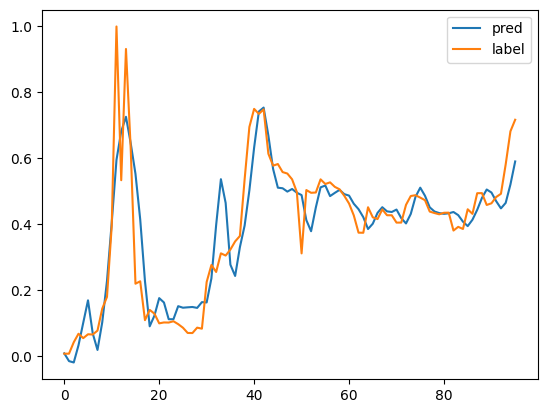

Epoch 151 Loss: 0.008432148024439812
Epoch 152 Loss: 0.008390884846448898
Epoch 153 Loss: 0.008349310606718063
Epoch 154 Loss: 0.008308195509016514
Epoch 155 Loss: 0.008266131393611431
Epoch 156 Loss: 0.00821894221007824
Epoch 157 Loss: 0.00817155372351408
Epoch 158 Loss: 0.008126799017190933
Epoch 159 Loss: 0.008078399114310741
Epoch 160 Loss: 0.00802965834736824
Epoch 161 Loss: 0.00797973107546568
Epoch 162 Loss: 0.007930570282042027
Epoch 163 Loss: 0.007882758043706417
Epoch 164 Loss: 0.007830712012946606
Epoch 165 Loss: 0.0077827670611441135
Epoch 166 Loss: 0.0077373250387609005
Epoch 167 Loss: 0.007692255545407534
Epoch 168 Loss: 0.00764157809317112
Epoch 169 Loss: 0.0075914207845926285
Epoch 170 Loss: 0.007543697953224182
Epoch 171 Loss: 0.007497647777199745
Epoch 172 Loss: 0.007449807599186897
Epoch 173 Loss: 0.007407532539218664
Epoch 174 Loss: 0.007359506096690893
Epoch 175 Loss: 0.0073118447326123714
Epoch 176 Loss: 0.007269356399774551
Epoch 177 Loss: 0.0072253309190273285
E

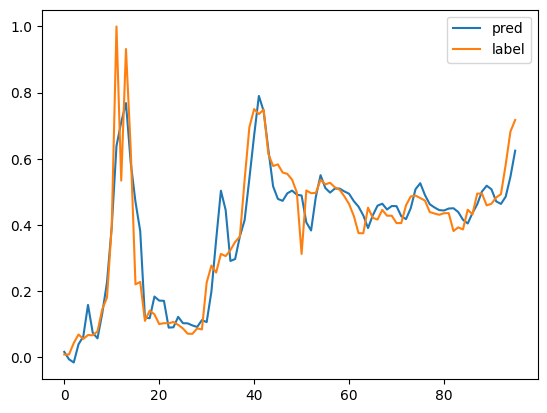

Epoch 201 Loss: 0.006377150770276785
Epoch 202 Loss: 0.006349446251988411
Epoch 203 Loss: 0.00632297620177269
Epoch 204 Loss: 0.0062911114655435085
Epoch 205 Loss: 0.006273910868912935
Epoch 206 Loss: 0.006238327827304602
Epoch 207 Loss: 0.006223667878657579
Epoch 208 Loss: 0.006190934684127569
Epoch 209 Loss: 0.006154988426715136
Epoch 210 Loss: 0.00613149581477046
Epoch 211 Loss: 0.006101055070757866
Epoch 212 Loss: 0.006073506083339453
Epoch 213 Loss: 0.006034743506461382
Epoch 214 Loss: 0.00601956108585
Epoch 215 Loss: 0.005979442503303289
Epoch 216 Loss: 0.0059699187986552715
Epoch 217 Loss: 0.005943706724792719
Epoch 218 Loss: 0.005898573901504278
Epoch 219 Loss: 0.00588564807549119
Epoch 220 Loss: 0.005849991459399462
Epoch 221 Loss: 0.0058122314512729645
Epoch 222 Loss: 0.005791414529085159
Epoch 223 Loss: 0.0057518258690834045
Epoch 224 Loss: 0.005722468718886375
Epoch 225 Loss: 0.005690766032785177
Epoch 226 Loss: 0.005655893590301275
Epoch 227 Loss: 0.005629485007375479
Epoc

LSTMModel(
  (rnn): RNN(4, 100, batch_first=True)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [350]:
# data input
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))

# Hyperparameters
input_size = 4
hidden_layer_size = 100
output_size = 1
num_layers = 3

# Instantiate the model
model = LSTMModel(input_size, hidden_layer_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
# criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 250
batch_size = 45

for epoch in range(epochs):

    # Convert inputs and labels to Variables to accumulate gradients
    inputs = Variable(X_train_tensor)
    labels = Variable(y_train_tensor)

    # Zero the gradients accumulated in the optimizer
    optimizer.zero_grad()

    # Forward pass, backward pass, optimize
    outputs = model(inputs)
    labels = labels.reshape(outputs.shape)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # plot
    if epoch % 50 == 0:
      plt.plot(outputs.detach().numpy().flatten(), label='pred')
      plt.plot(labels.detach().numpy().flatten(), label='label')
      plt.legend()
      plt.show()

    print(f'Epoch {epoch+1} Loss: {loss.item()}')

# Convert the model to evaluation mode
model.eval()

In [256]:
business_days = pd.date_range(start=pd.to_datetime(TRAIN_END_DATE) + timedelta(days=1),
                              periods=66, freq='B')

In [257]:
# 2021-07-5 is not dealing
df[df['Date'] == '2021-07-05']

# remove it
dates_to_remove = pd.DatetimeIndex(['2021-07-05'])
business_days = business_days.difference(dates_to_remove)

In [258]:
len(business_days)

65

In [259]:
# # Get the last sequence from the training data
# last_sequence = X_train[-1].reshape((1, SEQUENCE_LENGTH, 1))

In [351]:
# Assuming you have test data X_test as a numpy array
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))

# No need to track gradients for validation or inference
with torch.no_grad():
    # Convert the test set into a torch Variable
    inputs = Variable(X_test_tensor)
    
    # Get the model's predictions
    predictions1 = model(inputs)

predictions1 = predictions.repeat(1, 4)
# # If you've scaled your data with MinMaxScaler, you should inverse transform your predictions
predictions1 = scaler.inverse_transform(predictions.numpy())
predictions1 = predictions[:, 0]

# Create a DataFrame with the predicted stock prices and dates
predictions_df = pd.DataFrame({
    'Date': business_days,
    'Predicted_Close': predictions1.flatten()
})

# Show the prediction results
print(predictions_df)

AxisError: axis 4 is out of bounds for array of dimension 1

In [261]:
# Continue from the previous predictions_df creation code

# Ensure the 'Date' columns in both DataFrames are in the same format
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])

# Merge the predictions with the actual closing prices from 'df'
predictions_with_actuals_df = predictions_df.merge(df[['Date', 'Close']], on='Date', how='left')

# Rename columns for clarity
predictions_with_actuals_df.rename(columns={'Close': 'Actual_Close'}, inplace=True)

# Show the DataFrame with predictions and actual closing prices
print(predictions_with_actuals_df)

         Date  Predicted_Close  Actual_Close
0  2021-06-01        53.514771     62.255001
1  2021-06-02        48.235828     70.559998
2  2021-06-03        53.894882     64.544998
3  2021-06-04        58.251698     62.090000
4  2021-06-07        53.036995     70.002502
..        ...              ...           ...
60 2021-08-25        47.132576     49.912498
61 2021-08-26        50.731647     51.305000
62 2021-08-27        51.156544     51.237499
63 2021-08-30        45.497749     52.299999
64 2021-08-31        46.666264     54.560001

[65 rows x 3 columns]


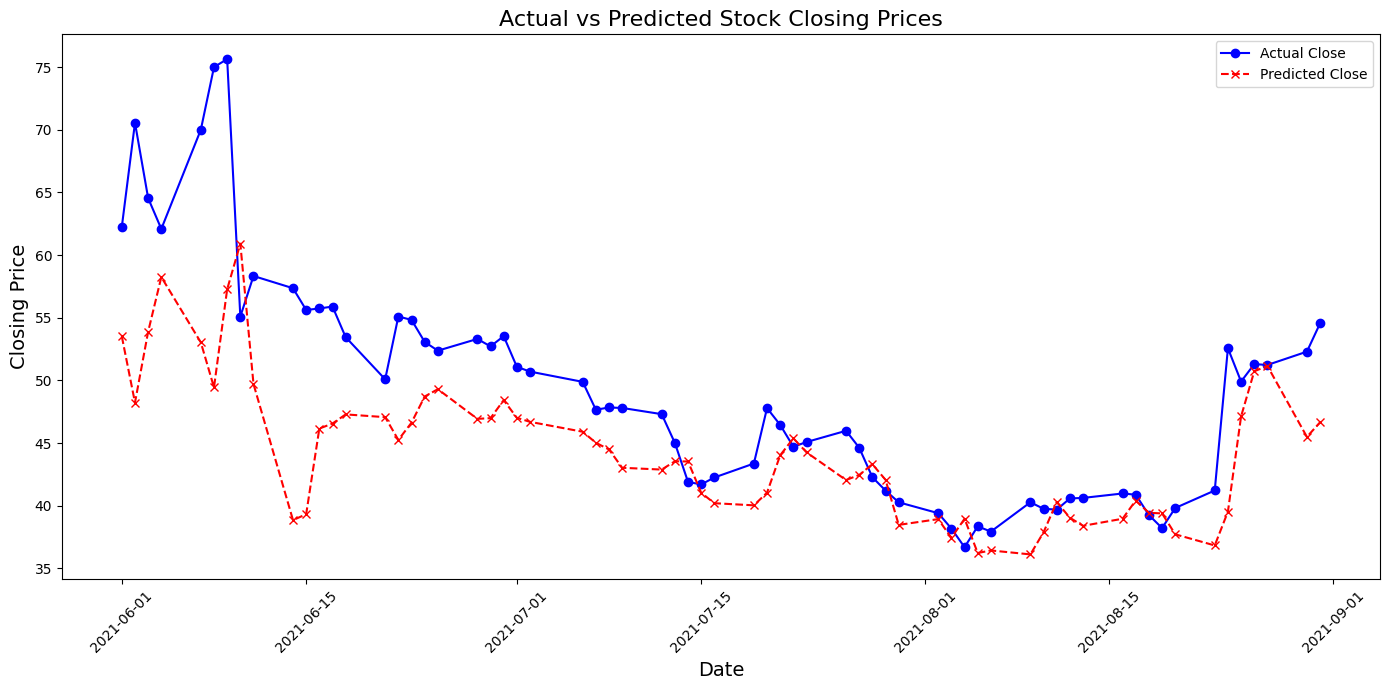

In [262]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format for proper plotting
predictions_with_actuals_df['Date'] = pd.to_datetime(predictions_with_actuals_df['Date'])

# Setting the plot size for better readability
plt.figure(figsize=(14, 7))

# Plotting the actual closing prices
plt.plot(predictions_with_actuals_df['Date'], predictions_with_actuals_df['Actual_Close'], label='Actual Close', color='blue', marker='o')

# Plotting the predicted closing prices
plt.plot(predictions_with_actuals_df['Date'], predictions_with_actuals_df['Predicted_Close'], label='Predicted Close', color='red', linestyle='--', marker='x')

# Adding title and labels with font size adjustments
plt.title('Actual vs Predicted Stock Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Rotating date labels for better visibility
plt.xticks(rotation=45)

# Adding a legend to distinguish between actual and predicted values
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [344]:
# data input
X2_train_tensor = torch.from_numpy(X2_train.astype(np.float32))
y2_train_tensor = torch.from_numpy(y2_train.astype(np.float32))

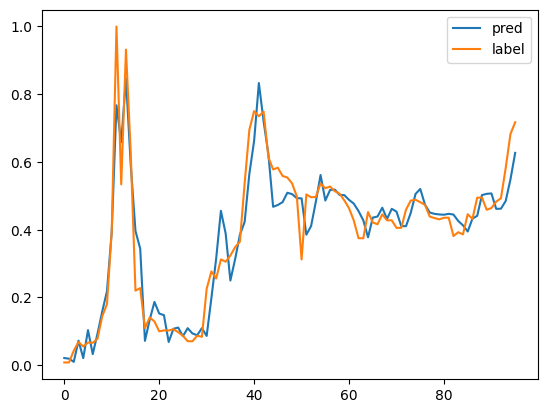

Epoch 1 Loss: 0.004433926660567522
Epoch 2 Loss: 0.0043884566985070705
Epoch 3 Loss: 0.004344973247498274
Epoch 4 Loss: 0.004306052345782518
Epoch 5 Loss: 0.004264363553375006
Epoch 6 Loss: 0.004226519260555506
Epoch 7 Loss: 0.004187676124274731
Epoch 8 Loss: 0.004151894245296717
Epoch 9 Loss: 0.004111435264348984
Epoch 10 Loss: 0.004075320903211832
Epoch 11 Loss: 0.004041148815304041
Epoch 12 Loss: 0.004006533417850733
Epoch 13 Loss: 0.003967244178056717
Epoch 14 Loss: 0.003930006641894579
Epoch 15 Loss: 0.003897764952853322
Epoch 16 Loss: 0.0038650231435894966
Epoch 17 Loss: 0.0038275334518402815
Epoch 18 Loss: 0.003790028393268585
Epoch 19 Loss: 0.003759867511689663
Epoch 20 Loss: 0.0037204299587756395
Epoch 21 Loss: 0.0036696146707981825
Epoch 22 Loss: 0.003614996327087283
Epoch 23 Loss: 0.0035578953102231026
Epoch 24 Loss: 0.0035137927625328302
Epoch 25 Loss: 0.0034781843423843384
Epoch 26 Loss: 0.003453796962276101
Epoch 27 Loss: 0.0034271155018359423
Epoch 28 Loss: 0.00339732202

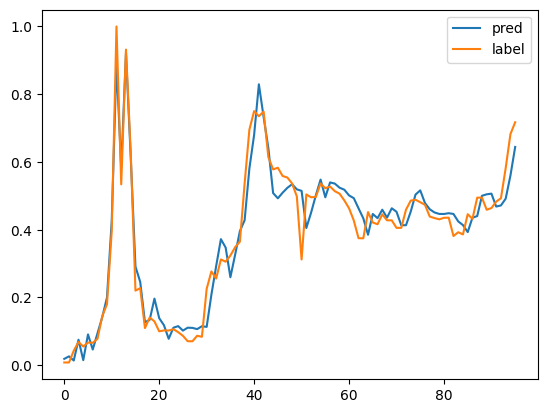

Epoch 51 Loss: 0.0026692207902669907
Epoch 52 Loss: 0.002644247142598033
Epoch 53 Loss: 0.0026193950325250626
Epoch 54 Loss: 0.0026012128219008446
Epoch 55 Loss: 0.002577141160145402
Epoch 56 Loss: 0.0025607296265661716
Epoch 57 Loss: 0.002537861932069063
Epoch 58 Loss: 0.002524974988773465
Epoch 59 Loss: 0.002501292387023568
Epoch 60 Loss: 0.002492782659828663
Epoch 61 Loss: 0.0024684909731149673
Epoch 62 Loss: 0.0024560317397117615
Epoch 63 Loss: 0.0024357822258025408
Epoch 64 Loss: 0.002432473935186863
Epoch 65 Loss: 0.0024203036446124315
Epoch 66 Loss: 0.002424407284706831
Epoch 67 Loss: 0.002420159988105297
Epoch 68 Loss: 0.002426830353215337
Epoch 69 Loss: 0.002423626370728016
Epoch 70 Loss: 0.002410692861303687
Epoch 71 Loss: 0.0023748597595840693
Epoch 72 Loss: 0.002339291153475642
Epoch 73 Loss: 0.0023027374409139156
Epoch 74 Loss: 0.00228498806245625
Epoch 75 Loss: 0.0022788969799876213
Epoch 76 Loss: 0.002285771770402789
Epoch 77 Loss: 0.0022939976770430803
Epoch 78 Loss: 0.

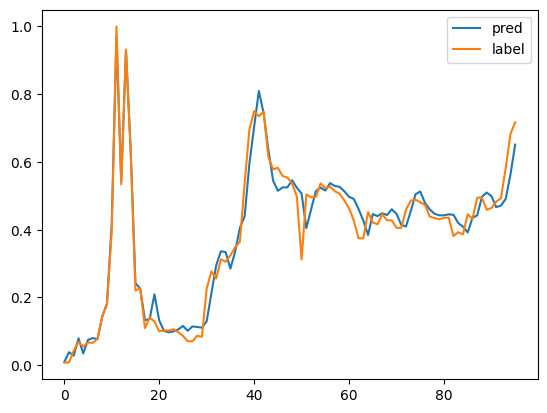

Epoch 101 Loss: 0.0020465394482016563
Epoch 102 Loss: 0.002036017132923007
Epoch 103 Loss: 0.0020285823848098516
Epoch 104 Loss: 0.0020331668201833963
Epoch 105 Loss: 0.002022817963734269
Epoch 106 Loss: 0.002020725980401039
Epoch 107 Loss: 0.0020132667850703
Epoch 108 Loss: 0.0020033984910696745
Epoch 109 Loss: 0.0019962505903095007
Epoch 110 Loss: 0.001989188138395548
Epoch 111 Loss: 0.001983734080567956
Epoch 112 Loss: 0.0019792772363871336
Epoch 113 Loss: 0.0019747386686503887
Epoch 114 Loss: 0.001970250392332673
Epoch 115 Loss: 0.001967979595065117
Epoch 116 Loss: 0.001962768379598856
Epoch 117 Loss: 0.0019591543823480606
Epoch 118 Loss: 0.0019576915074139833
Epoch 119 Loss: 0.001958391396328807
Epoch 120 Loss: 0.0019563748501241207
Epoch 121 Loss: 0.001955044688656926
Epoch 122 Loss: 0.0019519772613421082
Epoch 123 Loss: 0.001946792472153902
Epoch 124 Loss: 0.0019395407289266586
Epoch 125 Loss: 0.0019296406535431743
Epoch 126 Loss: 0.0019208065932616591
Epoch 127 Loss: 0.00191018

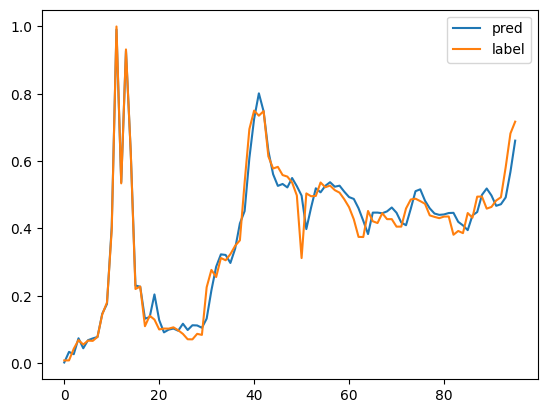

Epoch 151 Loss: 0.0018226668471470475
Epoch 152 Loss: 0.0018104556947946548
Epoch 153 Loss: 0.0018087000353261828
Epoch 154 Loss: 0.0018144183559343219
Epoch 155 Loss: 0.001822691410779953
Epoch 156 Loss: 0.0018315025372430682
Epoch 157 Loss: 0.0018295301124453545
Epoch 158 Loss: 0.001824103412218392
Epoch 159 Loss: 0.001809101551771164
Epoch 160 Loss: 0.001792771159671247
Epoch 161 Loss: 0.0017805887619033456
Epoch 162 Loss: 0.0017774883890524507
Epoch 163 Loss: 0.0017818374326452613
Epoch 164 Loss: 0.0017902253894135356
Epoch 165 Loss: 0.0017941788537427783
Epoch 166 Loss: 0.0017929262248799205
Epoch 167 Loss: 0.0017840545624494553
Epoch 168 Loss: 0.001772798947058618
Epoch 169 Loss: 0.0017617358826100826
Epoch 170 Loss: 0.0017536020604893565
Epoch 171 Loss: 0.0017513501225039363
Epoch 172 Loss: 0.001750970259308815
Epoch 173 Loss: 0.0017518685199320316
Epoch 174 Loss: 0.0017534345388412476
Epoch 175 Loss: 0.0017540944973006845
Epoch 176 Loss: 0.0017551238415762782
Epoch 177 Loss: 0.

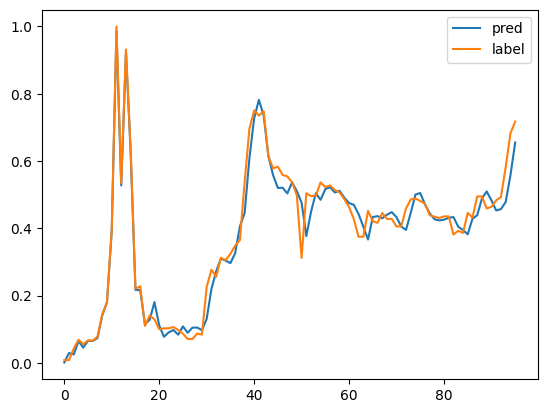

Epoch 201 Loss: 0.0017511049518361688
Epoch 202 Loss: 0.0017612064257264137
Epoch 203 Loss: 0.0017549442127346992
Epoch 204 Loss: 0.0017463513650000095
Epoch 205 Loss: 0.0017204043688252568
Epoch 206 Loss: 0.0016878541791811585
Epoch 207 Loss: 0.0016646619187667966
Epoch 208 Loss: 0.0016566580161452293
Epoch 209 Loss: 0.0016628358280286193
Epoch 210 Loss: 0.0016767875058576465
Epoch 211 Loss: 0.0016868211096152663
Epoch 212 Loss: 0.001689229509793222
Epoch 213 Loss: 0.0016816830029711127
Epoch 214 Loss: 0.0016673561185598373
Epoch 215 Loss: 0.0016519910423085093
Epoch 216 Loss: 0.001639158115722239
Epoch 217 Loss: 0.0016345271142199636
Epoch 218 Loss: 0.0016342789167538285
Epoch 219 Loss: 0.001638472662307322
Epoch 220 Loss: 0.0016455407021567225
Epoch 221 Loss: 0.0016513880109414458
Epoch 222 Loss: 0.001656657550483942
Epoch 223 Loss: 0.0016579581424593925
Epoch 224 Loss: 0.001651913276873529
Epoch 225 Loss: 0.0016429448733106256
Epoch 226 Loss: 0.001631857710890472
Epoch 227 Loss: 0.

LSTMModel(
  (rnn): RNN(4, 100, batch_first=True)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [345]:
for epoch in range(epochs):

    # Convert inputs and labels to Variables to accumulate gradients
    inputs = Variable(X2_train_tensor)
    labels = Variable(y2_train_tensor)

    # Zero the gradients accumulated in the optimizer
    optimizer.zero_grad()

    # Forward pass, backward pass, optimize
    outputs = model(inputs)
    labels = labels.reshape(outputs.shape)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # plot
    if epoch % 50 == 0:
      plt.plot(outputs.detach().numpy().flatten(), label='pred')
      plt.plot(labels.detach().numpy().flatten(), label='label')
      plt.legend()
      plt.show()

    print(f'Epoch {epoch+1} Loss: {loss.item()}')

# Convert the model to evaluation mode
model.eval()

In [347]:
# Assuming you have test data X_test as a numpy array
X2_test_tensor = torch.from_numpy(X2_test.astype(np.float32))

# No need to track gradients for validation or inference
with torch.no_grad():
    # Convert the test set into a torch Variable
    inputs = Variable(X_test_tensor)
    
    # Get the model's predictions
    predictions = model(inputs)

predictions = predictions.repeat(1, 4)
# # If you've scaled your data with MinMaxScaler, you should inverse transform your predictions
predictions = scaler.inverse_transform(predictions.numpy())
predictions = predictions[:, 0]

# Create a DataFrame with the predicted stock prices and dates
predictions_df = pd.DataFrame({
    'Date': business_days,
    'Predicted_Close': predictions.flatten()
})

# Show the prediction results
print(predictions_df)

         Date  Predicted_Close
0  2021-06-01        52.305511
1  2021-06-02        51.356503
2  2021-06-03        57.793060
3  2021-06-04        57.029194
4  2021-06-07        53.135170
..        ...              ...
60 2021-08-25        48.725269
61 2021-08-26        51.250847
62 2021-08-27        49.052837
63 2021-08-30        46.243195
64 2021-08-31        46.071201

[65 rows x 2 columns]


In [348]:
# Ensure the 'Date' columns in both DataFrames are in the same format
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])

# Merge the predictions with the actual closing prices from 'df'
predictions_with_actuals_df = predictions_df.merge(df[['Date', 'Close']], on='Date', how='left')

# Rename columns for clarity
predictions_with_actuals_df.rename(columns={'Close': 'Actual_Close'}, inplace=True)

# Show the DataFrame with predictions and actual closing prices
print(predictions_with_actuals_df)

         Date  Predicted_Close  Actual_Close
0  2021-06-01        52.305511     62.255001
1  2021-06-02        51.356503     70.559998
2  2021-06-03        57.793060     64.544998
3  2021-06-04        57.029194     62.090000
4  2021-06-07        53.135170     70.002502
..        ...              ...           ...
60 2021-08-25        48.725269     49.912498
61 2021-08-26        51.250847     51.305000
62 2021-08-27        49.052837     51.237499
63 2021-08-30        46.243195     52.299999
64 2021-08-31        46.071201     54.560001

[65 rows x 3 columns]


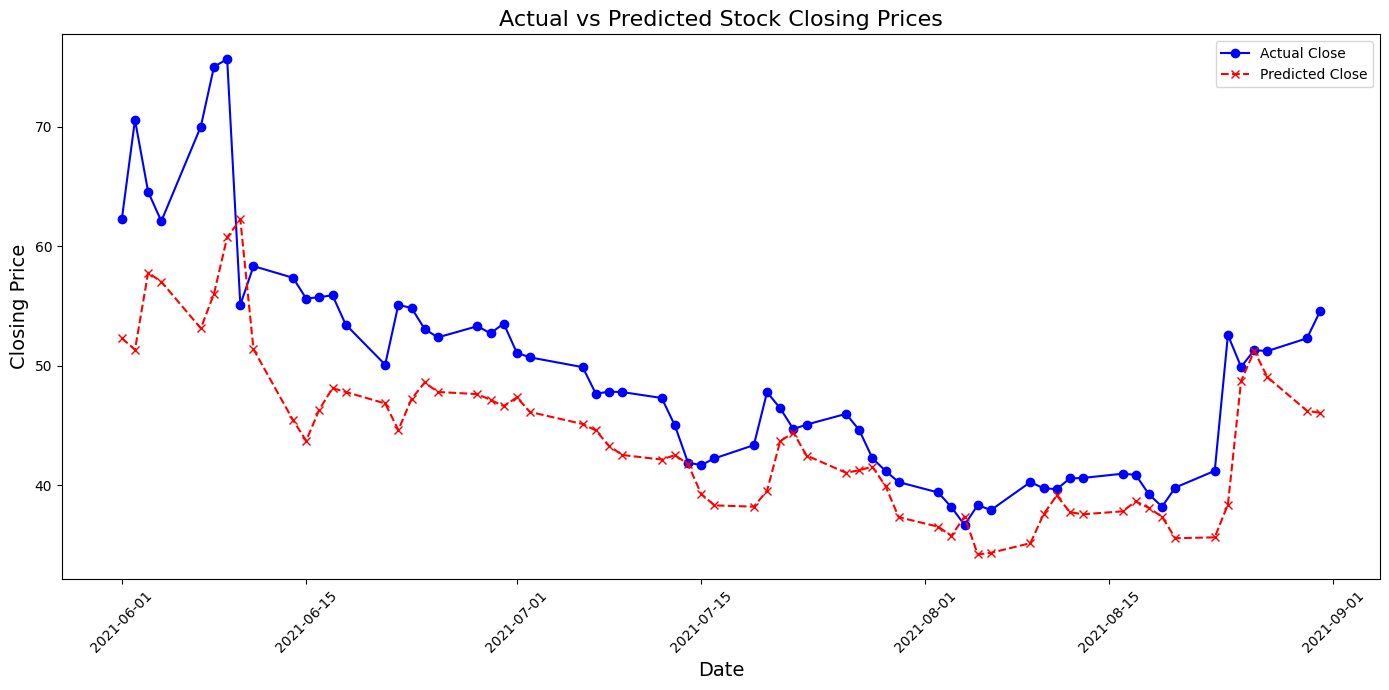

In [349]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format for proper plotting
predictions_with_actuals_df['Date'] = pd.to_datetime(predictions_with_actuals_df['Date'])

# Setting the plot size for better readability
plt.figure(figsize=(14, 7))

# Plotting the actual closing prices
plt.plot(predictions_with_actuals_df['Date'], predictions_with_actuals_df['Actual_Close'], label='Actual Close', color='blue', marker='o')

# Plotting the predicted closing prices
plt.plot(predictions_with_actuals_df['Date'], predictions_with_actuals_df['Predicted_Close'], label='Predicted Close', color='red', linestyle='--', marker='x')

# Adding title and labels with font size adjustments
plt.title('Actual vs Predicted Stock Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

# Rotating date labels for better visibility
plt.xticks(rotation=45)

# Adding a legend to distinguish between actual and predicted values
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()